In [1]:
# toc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

plt.style.use('../maroon_ipynb.mplstyle')

cancer = load_breast_cancer()
features = cancer.data
target = cancer.target
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Problem 1
The sklearn library includes a set of data containing image information on fine needle aspirates used to identify breast cancer. The dataset contains information gathered from the images as well as whether the mass was malignant (target=0) or benign (target=1).

In [2]:
# Showing the features of the dataset
feature_names = cancer.feature_names
temp_df = pd.DataFrame(features, columns=feature_names)
temp_df.head(n=4).transpose()

,0,1,2,3
mean radius,17.990000,20.570000,19.690000,11.420000
mean texture,10.380000,17.770000,21.250000,20.380000
mean perimeter,122.800000,132.900000,130.000000,77.580000
mean area,1001.000000,1326.000000,1203.000000,386.100000
mean smoothness,0.118400,0.084740,0.109600,0.142500
mean compactness,0.277600,0.078640,0.159900,0.283900
mean concavity,0.300100,0.086900,0.197400,0.241400
mean concave points,0.147100,0.070170,0.127900,0.105200
mean symmetry,0.241900,0.181200,0.206900,0.259700
mean fractal dimension,0.078710,0.056670,0.059990,0.097440


Perform a PCA transformation of the features and plot the individual and cumulative explained variable as a function of number of components.

## Solution

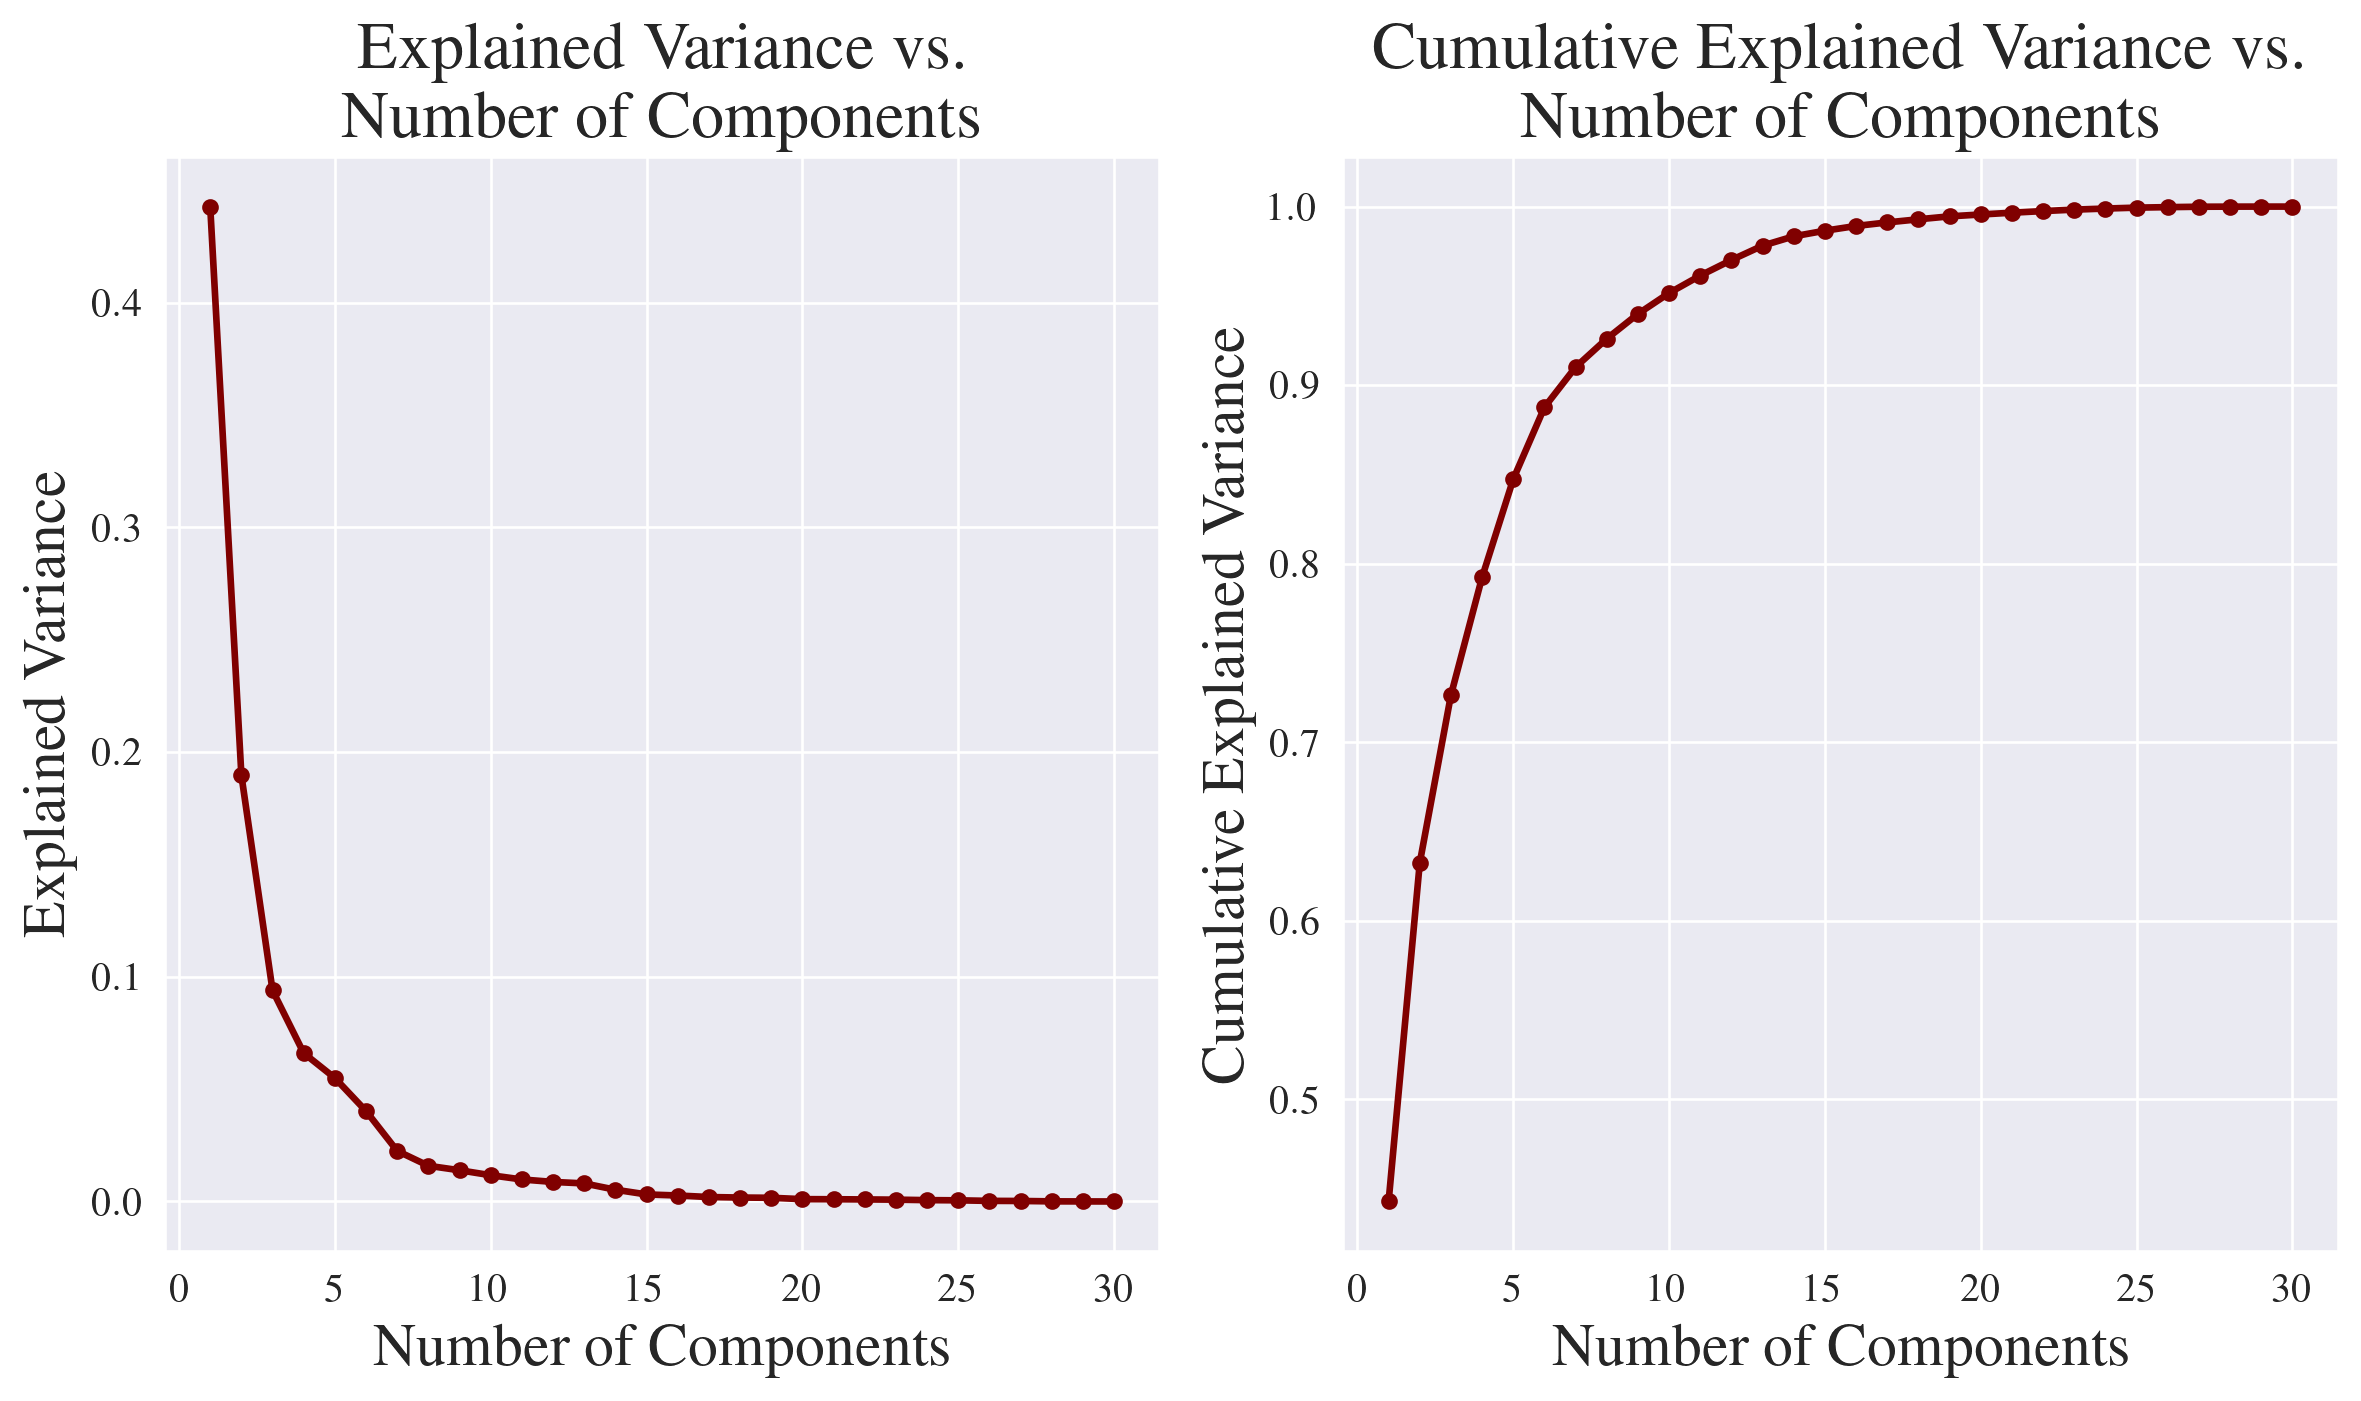

In [3]:
# Perform PCA transformation
pca = PCA()  # n_components should equal the number of features
pca.fit(features_scaled)

# Get explained variance
explained_variance = pca.explained_variance_ratio_

# Get the cumulative sum
cumulative_variance = np.cumsum(explained_variance)  # should go up to 1 at n=30

# Plot
components = np.arange(1, len(explained_variance) + 1, dtype=int)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(components, explained_variance, marker='.')
ax2.plot(components, cumulative_variance, marker='.')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Explained Variance')
ax1.set_title('Explained Variance vs.\n Number of Components')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance vs.\n Number of Components')
plt.show()

This analysis shows that the first nine components explain over 95% of variance in the data.

# Problem 2
Plot the first two components (component 1 along the x-axis and component 2 along the y-axis) for all the data, differentiating between malignant and benign samples. Are the two cases well differentiated by just the first two components?

## Solution
First let's fit a new PCA model that houses only the first two components.

In [4]:
# Make new PCA model
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

Let's check and see which feature has the most variance by inspecting the largest weight in the first two components.

In [5]:
w1, w2 = pca.components_
max1, max2 = np.argmax(w1), np.argmax(w2)
feature_names[max1], feature_names[max2]

(np.str_('mean concave points'), np.str_('mean fractal dimension'))

In [6]:
# Corresponding weight values
w1[max1], w2[max2]

(np.float64(0.2608537583857401), np.float64(0.36657547137825663))

Upon inspection, it appears as though the `mean concave points` and `mean fractal dimension` have the largest effect on the data, thus they should not be omitted. Let's plot the first two components and see if the data is well differentiated.

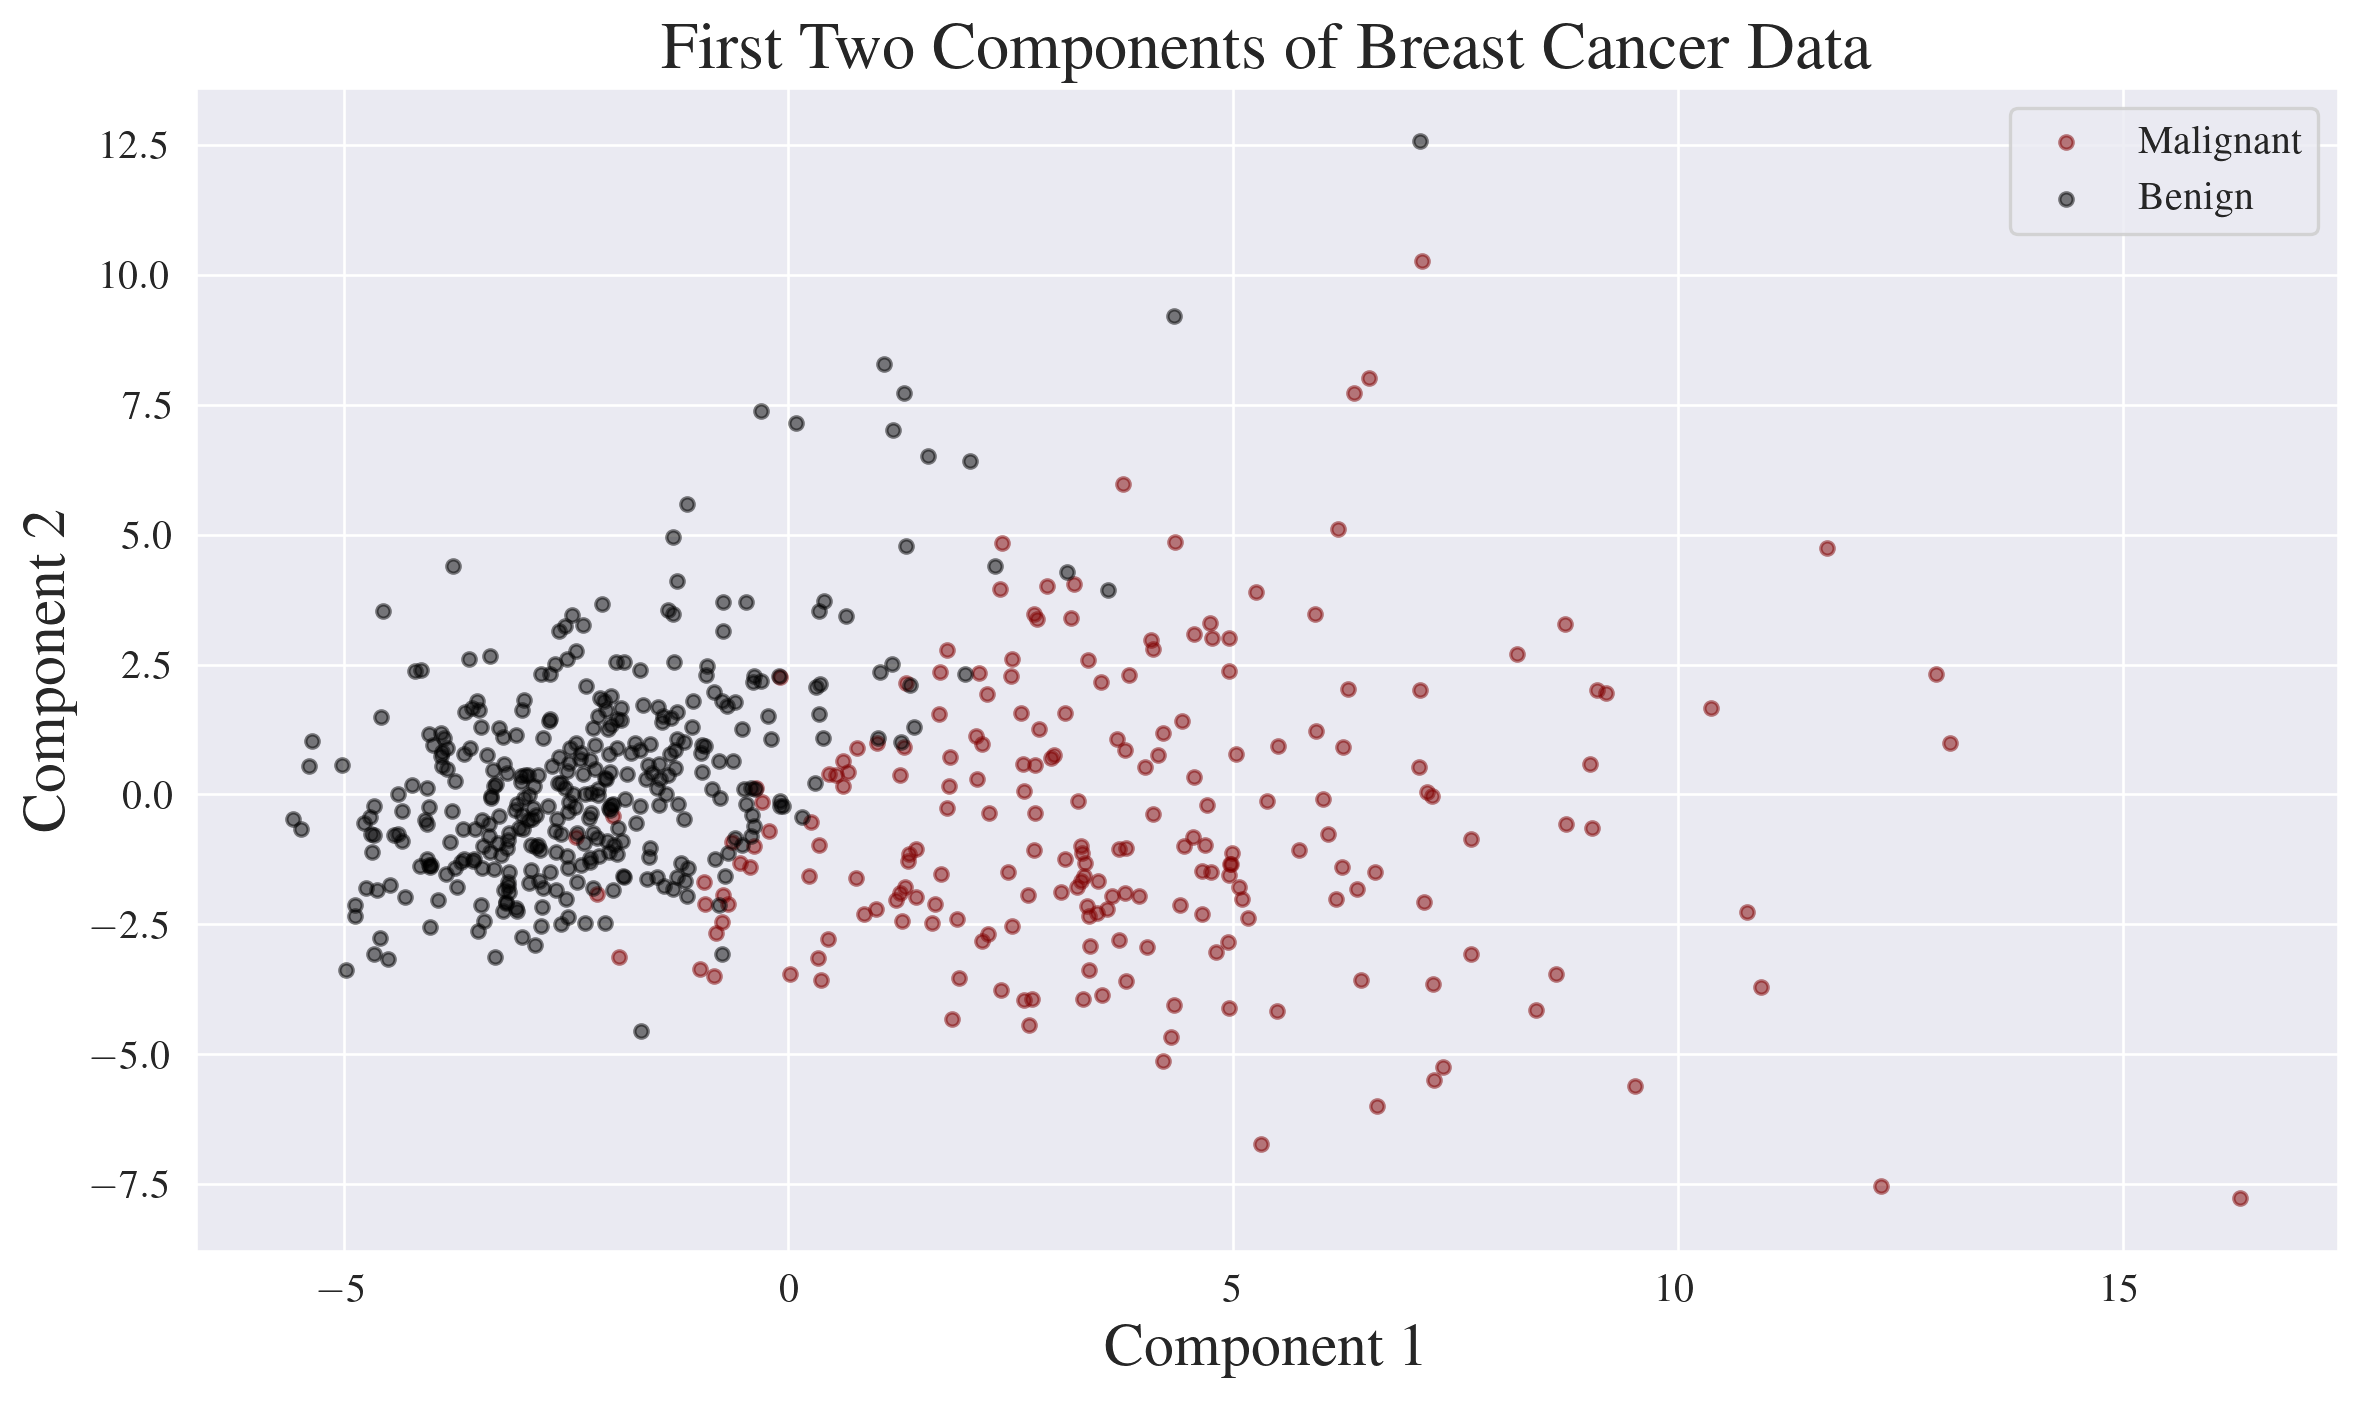

In [7]:
# Get indices
malignant = target == 0
benign = target == 1

# Plot the two important components
fig, ax = plt.subplots()
ax.scatter(features_pca[malignant, 0], features_pca[malignant, 1], label='Malignant', zorder=3, alpha=0.5, marker='.')
ax.scatter(features_pca[benign, 0], features_pca[benign, 1], label='Benign', zorder=3, alpha=0.5, marker='.')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('First Two Components of Breast Cancer Data')
ax.legend()
plt.show()

The results do show differentiation in separating malignant and benign. We can see an overlapping region where it maybe hard to distinguish the two, but we don't see false representations on the extremes of each case. The overlapping region suggests that although the first two principal components capture a large proportion of the variance in the dataset, they may not be sufficient to completely separate the two classes.

# Problem 3
Given that a linear kernel was sufficient for differentiating the two cases when using an SVC, does the result for question 2 make sense?

## Solution
The PCA analysis indicates that the first two components capture most of the important variance in the dataset and distinguish between malignant and benign cases fairly well. This suggests that the data is nearly linearly separable, which supports the use of a linear SVC. Since the previous homework showed that a linear SVC achieved about 98% accuracy, the PCA results reinforce that a linear decision boundary is sufficient for this classification task because you can see from the graph that you could roughly separate the two targets with a sloped line.

# Problem 4
Randomly select a subset containing 100 of the benign cases and perform PCA on this subset. Perform anomaly detection on the remaining benign and malignant cases using this new PCA transform. You will want to consider the information loss from keeping only a finite number of components.

## Solution
Let's randomly choose 100 benign cases.

In [8]:
benign_indices = np.where(benign)[0]
malignant_indices = np.where(malignant)[0]
np.random.seed(12)
benign_sample_indices = np.random.choice(benign_indices, size=100, replace=False)
benign_sample = features_scaled[benign_sample_indices, :]
all_others = np.delete(features_scaled, benign_sample_indices, axis=0)
all_other_indices = np.delete(np.arange(len(features_scaled)), benign_sample_indices)

Now we can perform PCA on this subset, and we will call this the "normal" data.

In [9]:
benign_pca = PCA(n_components=9)
_ = benign_pca.fit(benign_sample)

Now we can use the above PCA model that was only fitted to a random subset of benign cases to determine anomalies. We can do this by calculating the loss when transforming and inverse transforming the data back to the original space. The loss can be calculated as the sum of the squared error between the original data and the reconstructed data. We should see that the malignant cases have higher loss, and most of the benign cases should have lower loss, especially the ones that were selected for fitting.

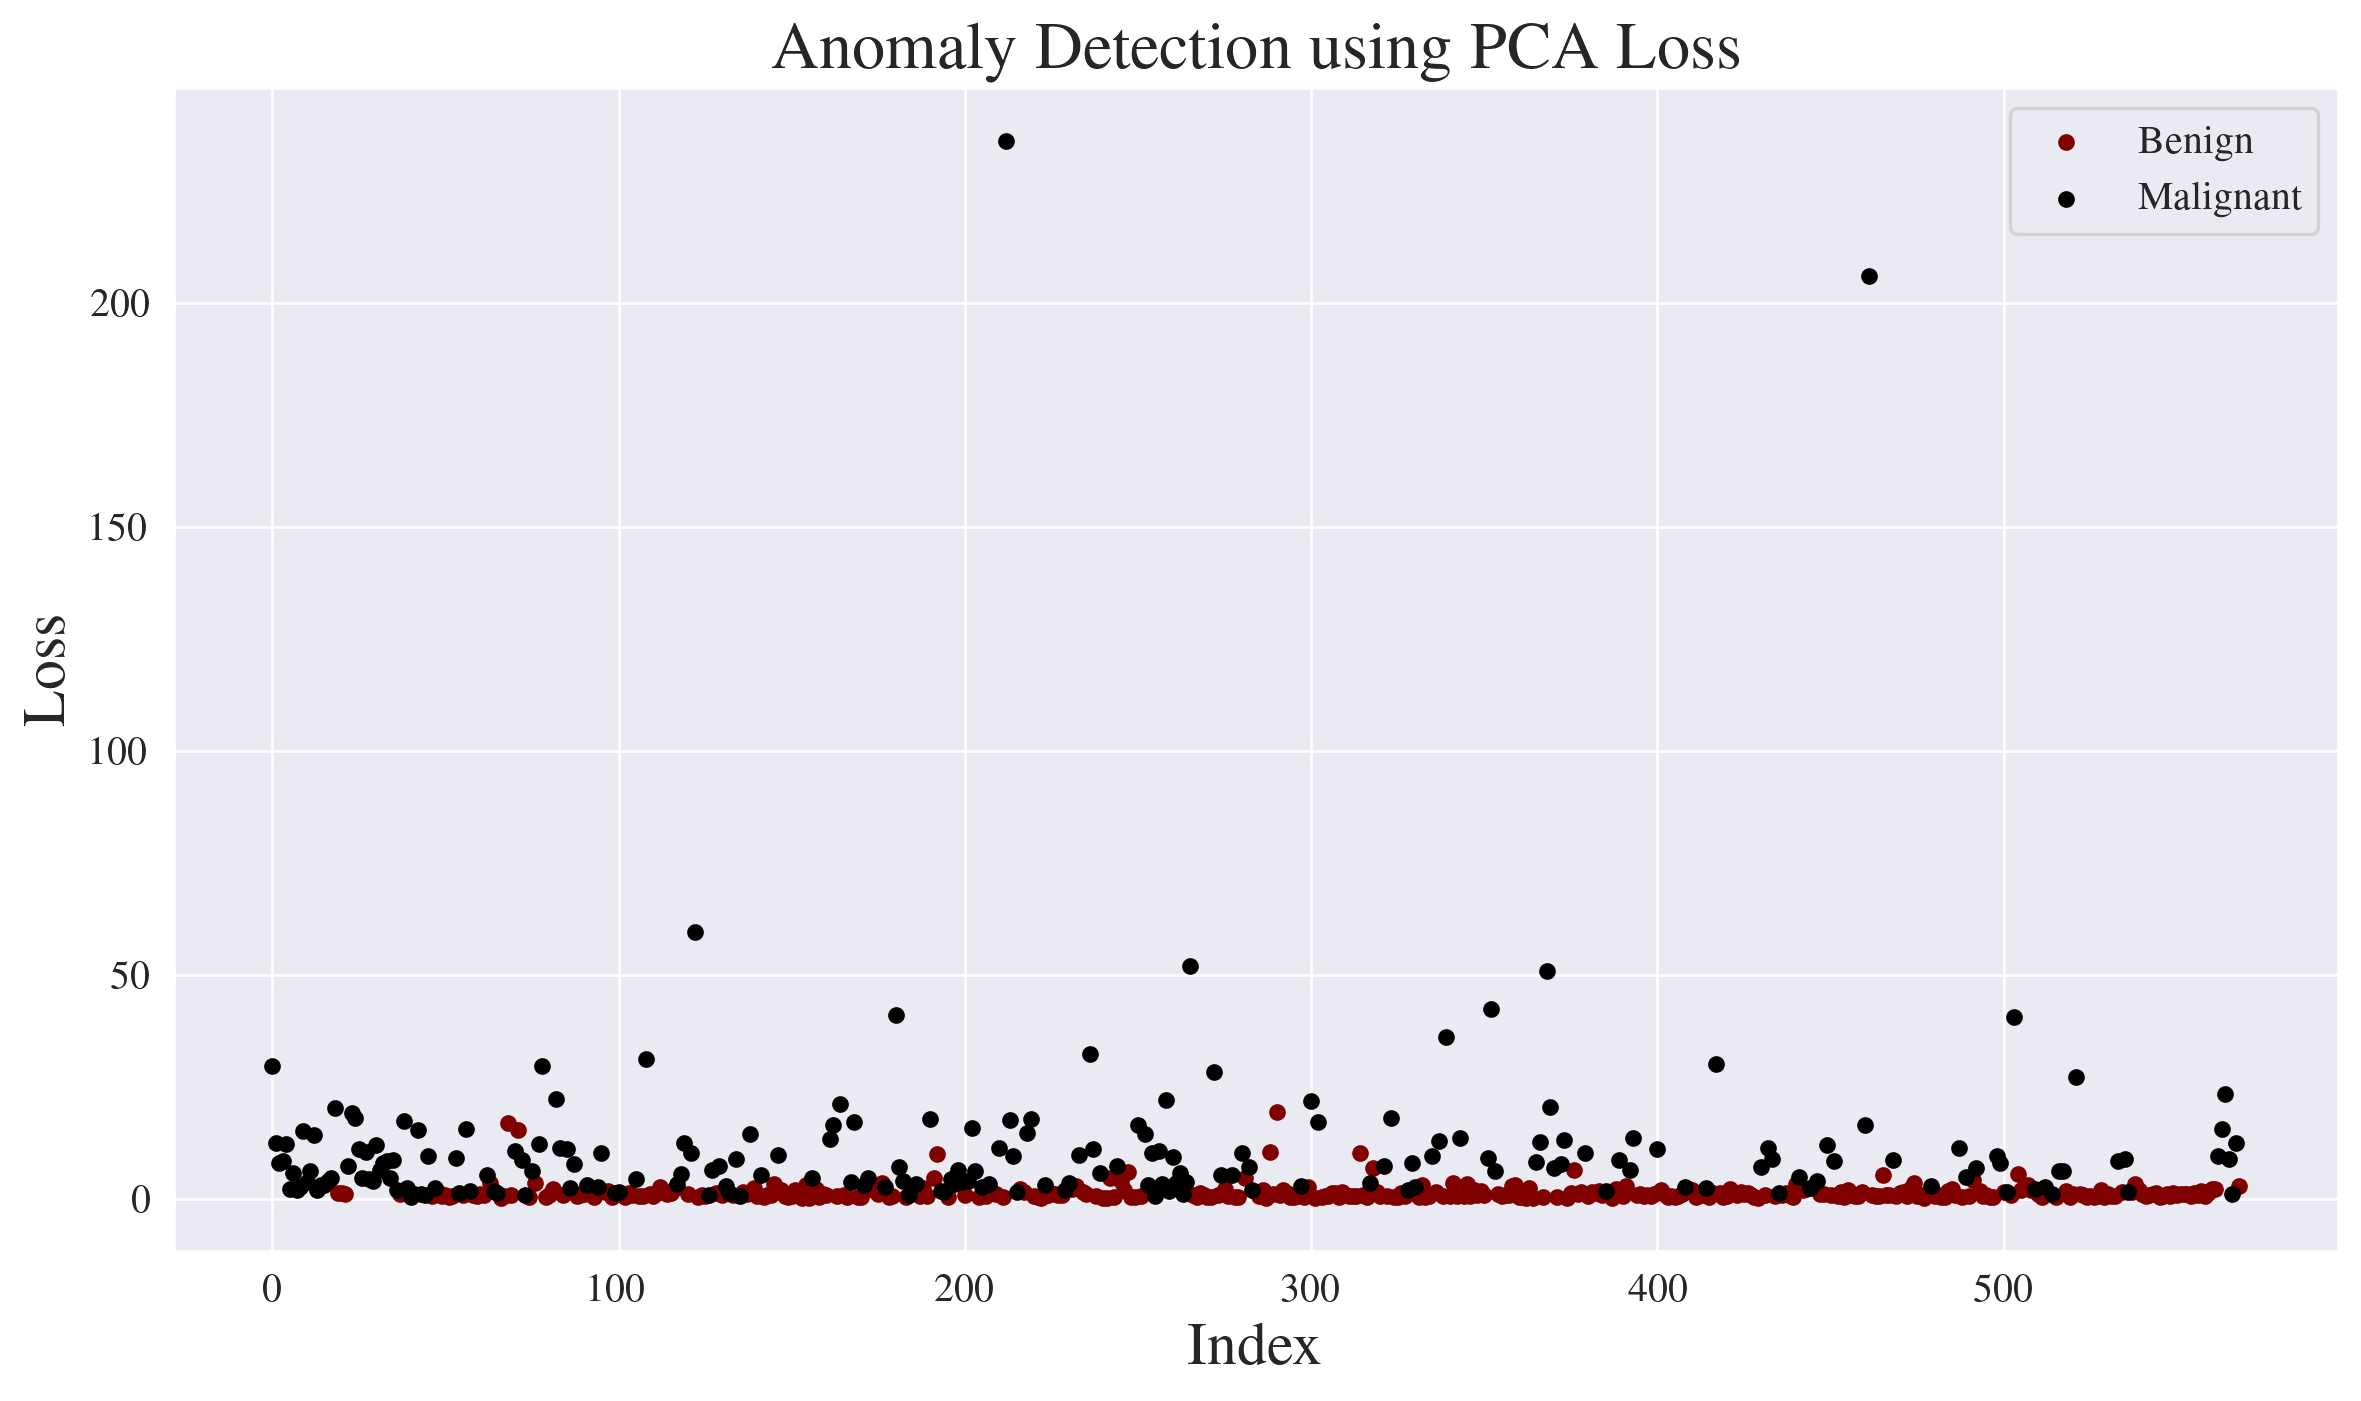

In [10]:
# Transform all the data
transformed = benign_pca.transform(features_scaled)
untransformed = benign_pca.inverse_transform(transformed)

# Calculate the loss
loss = np.sum((features_scaled - untransformed)**2, axis=1)

# Plot the loss showing the benign and malignant cases
fig, ax = plt.subplots()
# ax.set_yscale('log')
ax.scatter(benign_indices, loss[benign_indices], label='Benign', zorder=3, marker='.')
ax.scatter(malignant_indices, loss[malignant_indices], label='Malignant', zorder=3, marker='.')
ax.set_xlabel('Index')
ax.set_ylabel('Loss')
ax.set_title('Anomaly Detection using PCA Loss')
ax.legend()
plt.show()

There appears to be several extreme outliers. Let's make a new plot that adjusts the y-axis with a log scale to better represent the majority of the data.

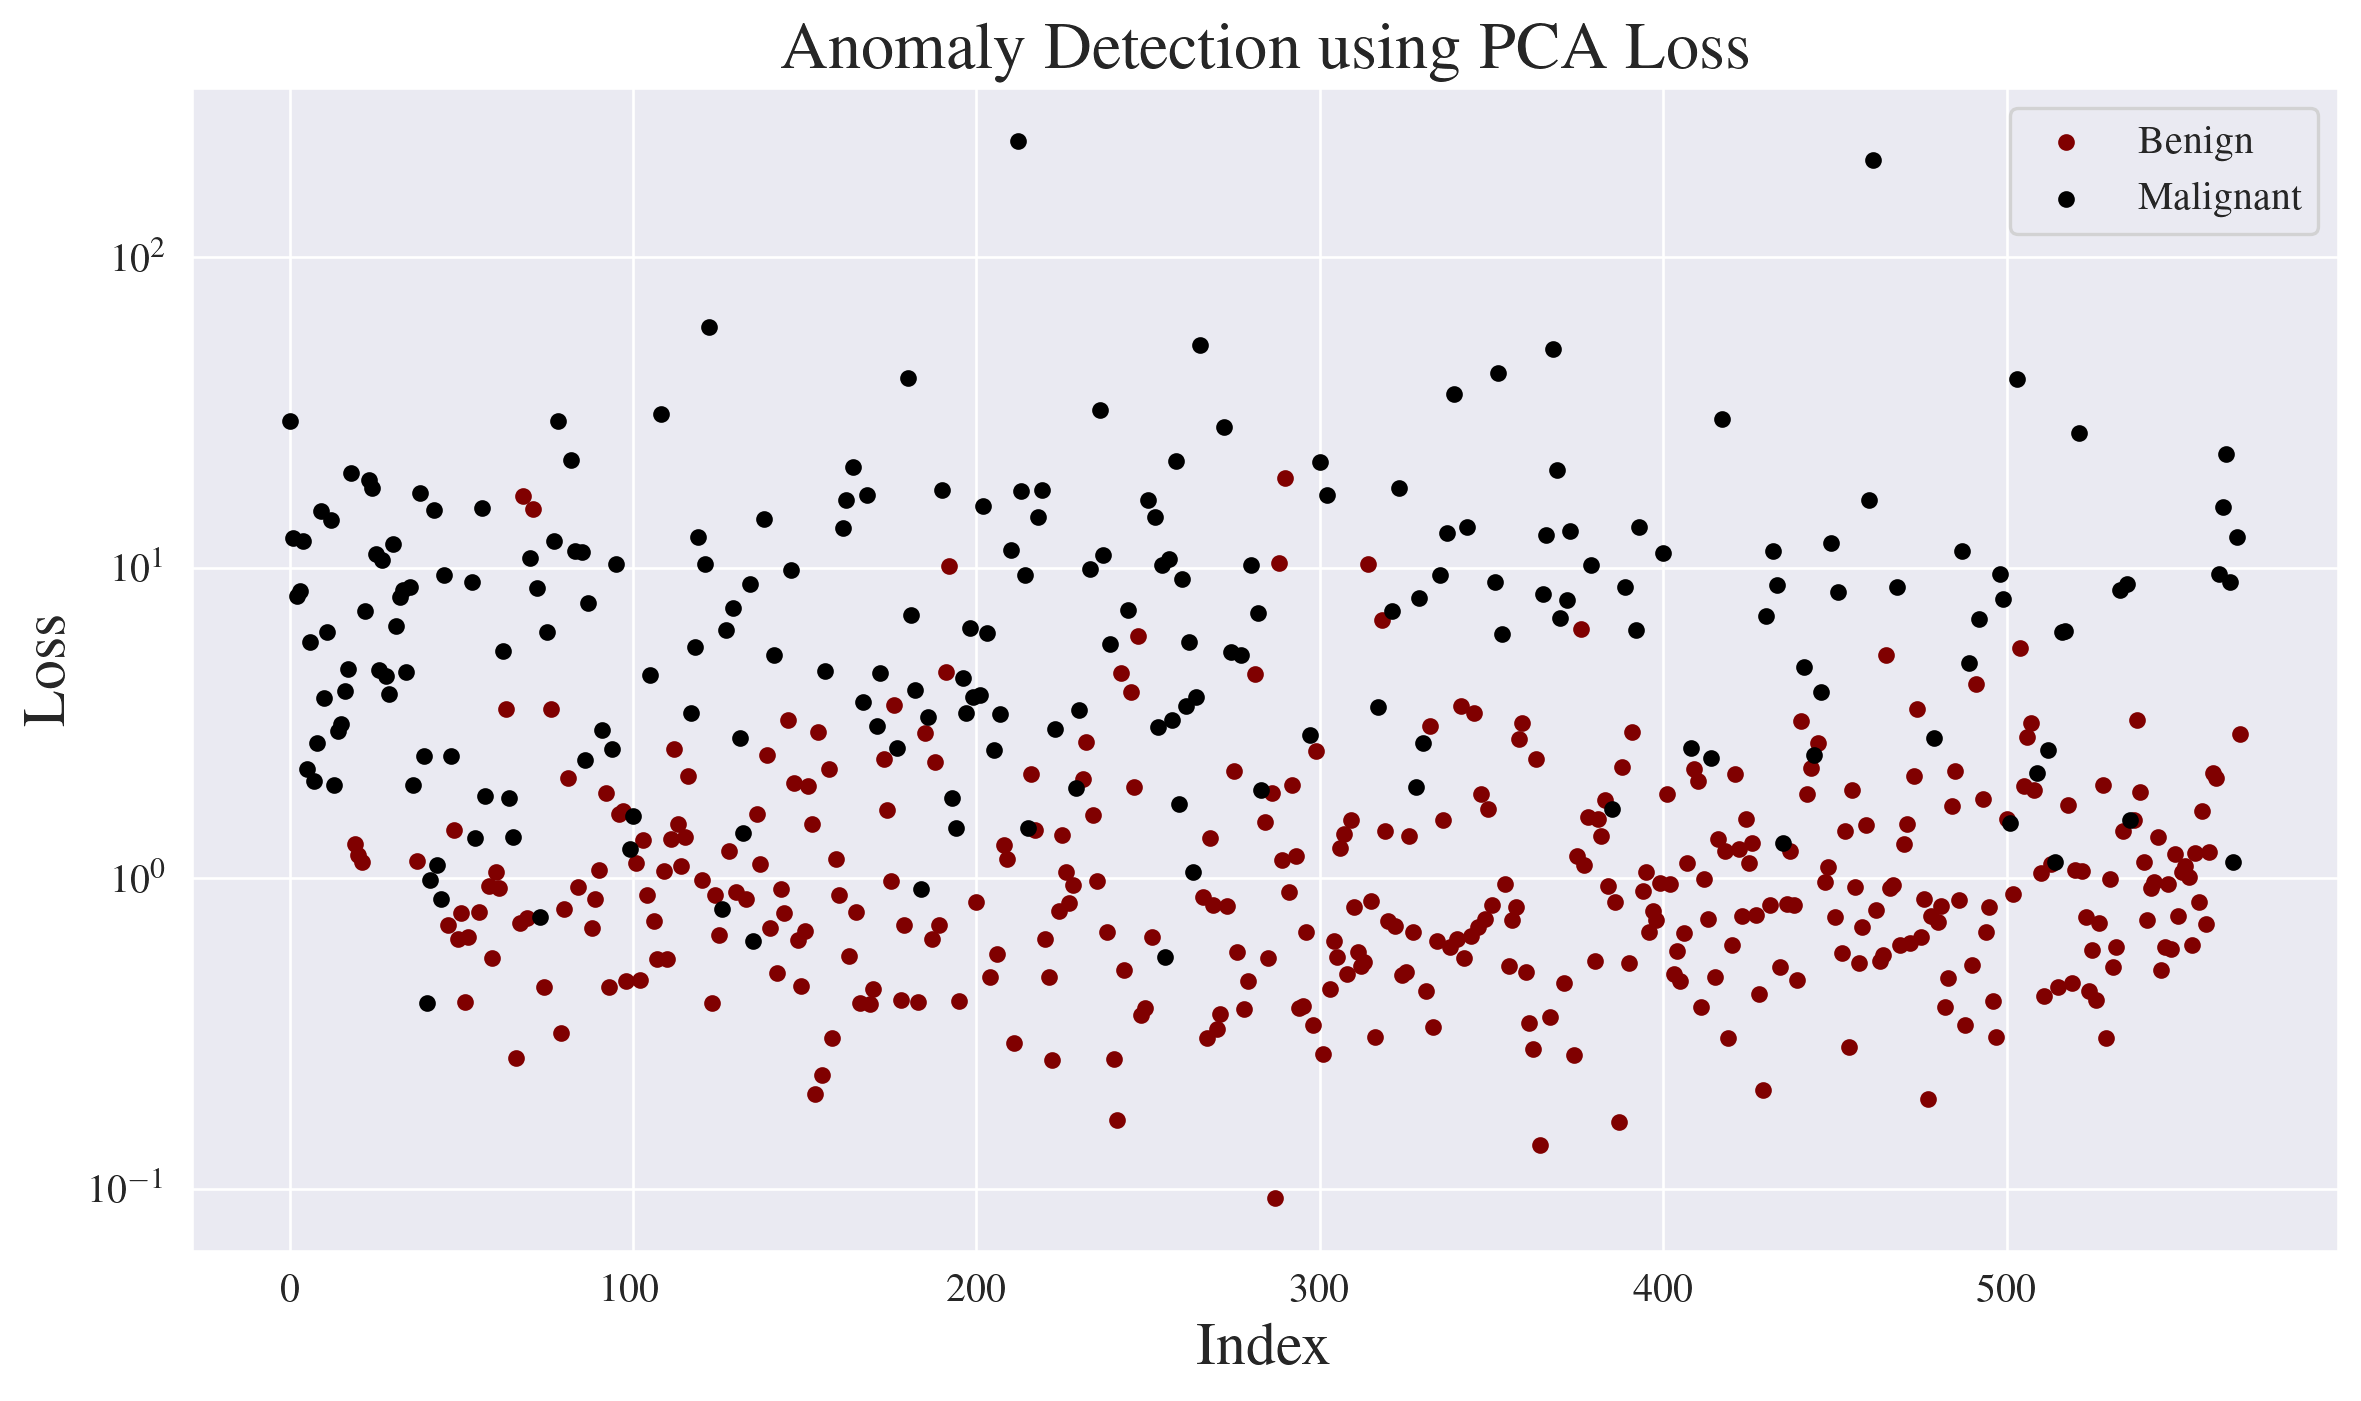

In [11]:
# Plot the loss showing the benign and malignant cases
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.scatter(benign_indices, loss[benign_indices], label='Benign', zorder=3, marker='.')
ax.scatter(malignant_indices, loss[malignant_indices], label='Malignant', zorder=3, marker='.')
ax.set_xlabel('Index')
ax.set_ylabel('Loss')
ax.set_title('Anomaly Detection using PCA Loss')
ax.legend()
plt.show()

Ok the log scale is a little better to recognize, but let's do one more plot that completely separates the benign and malignant cases on the x-axis. These above plots show the real index, but let's put all the benign points on the left side and the malignant points on the right side. This might be a little better for visualizing the results.

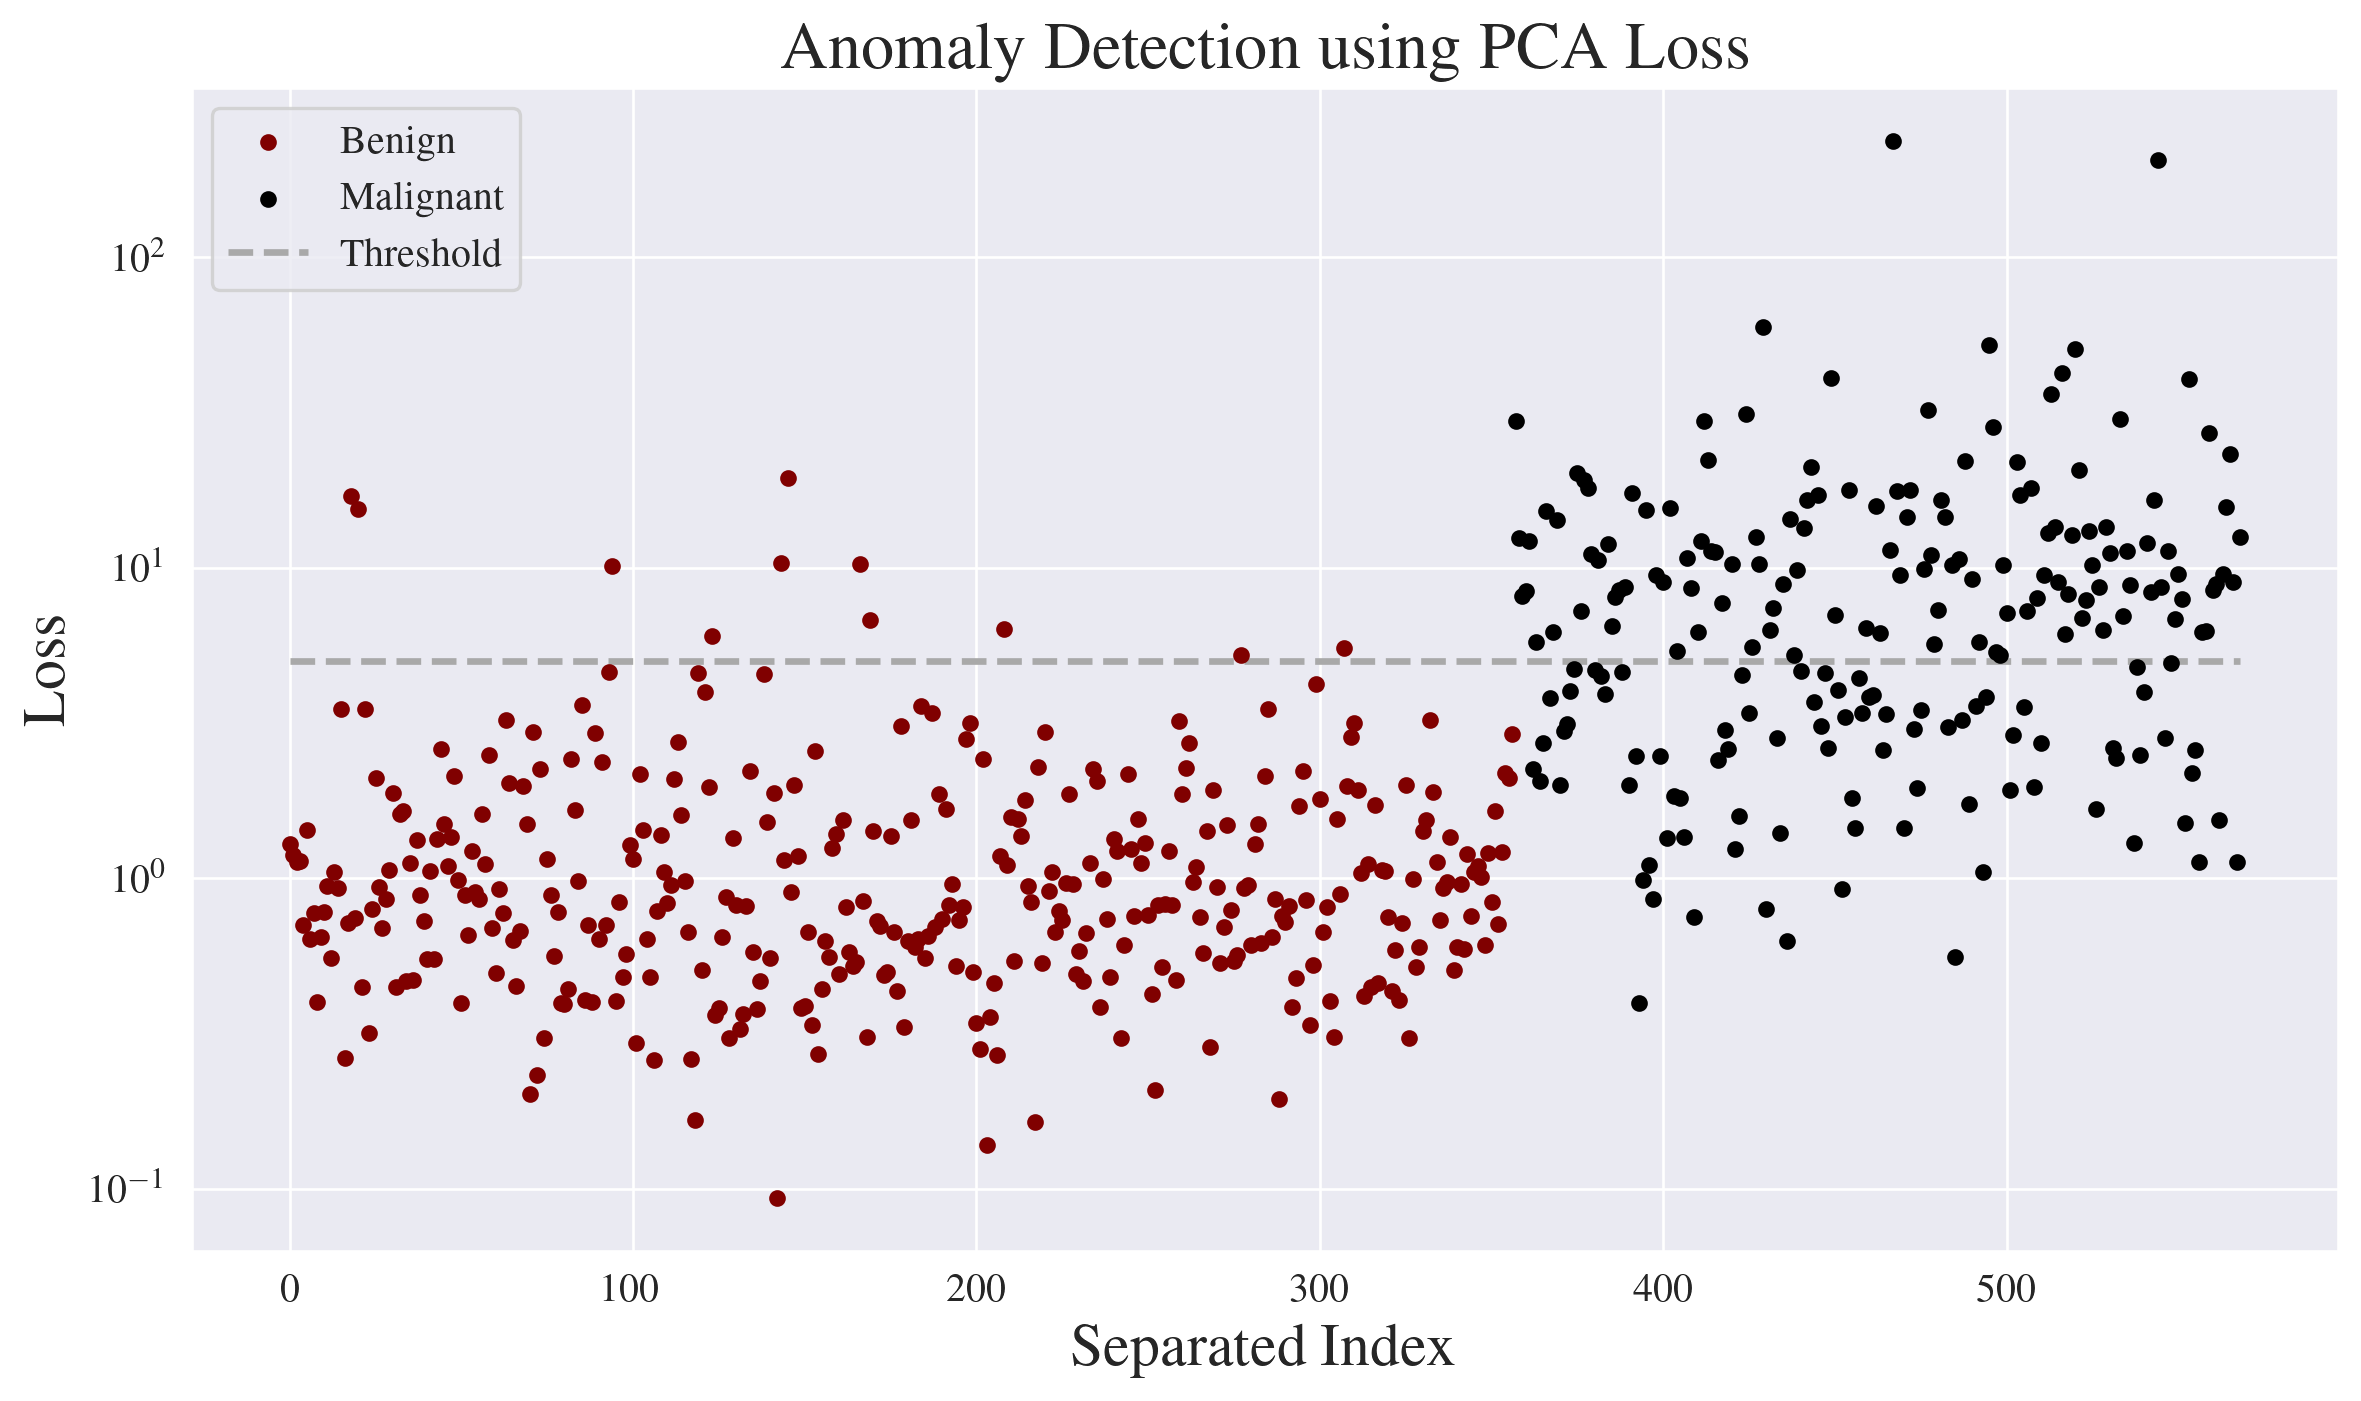

In [12]:
benign_left = np.arange(len(benign_indices))
malignant_right = np.arange(benign_left.size, benign_left.size + malignant_indices.size)

threshold = 5

# Plot the loss showing the benign and malignant cases
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.scatter(benign_left, loss[benign_indices], label='Benign', zorder=3, marker='.')
ax.scatter(malignant_right, loss[malignant_indices], label='Malignant', zorder=3, marker='.')
ax.plot([0, malignant_right[-1]], [threshold, threshold], label='Threshold', ls='--', color='darkgrey')
ax.set_xlabel('Separated Index')
ax.set_ylabel('Loss')
ax.set_title('Anomaly Detection using PCA Loss')
ax.legend()
plt.show()

These results show that there is some ability to separate benign and malignant with PCA, but it's not that great. No matter how you draw the threshold, there is still going to be a lot of cases that would get misclassified using this scheme.

# Problem 5
Determine a loss threshold and number of components to create a model for detecting potentially malignant cases using only PCA. Show the confusion matrix for this model.

## Solution
As for the number of components, I'll only select nine, but this time, I will fit the model to all benign cases.

In [13]:
# Fit PCA to all benign cases
all_benign_pca = PCA(n_components=9)
all_benign_pca.fit(features_scaled[benign])
all_benign_pca.explained_variance_ratio_  # first nine components should be sufficient

array([0.36214176, 0.16003607, 0.14036297, 0.08225223, 0.06153084,
       0.05228251, 0.02861886, 0.0242095 , 0.01908501])

In [14]:
float(sum(all_benign_pca.explained_variance_ratio_))  # shooting for above 90%

0.9305197451024788

I am going to define the loss as the 95th percentile of the benign loss.

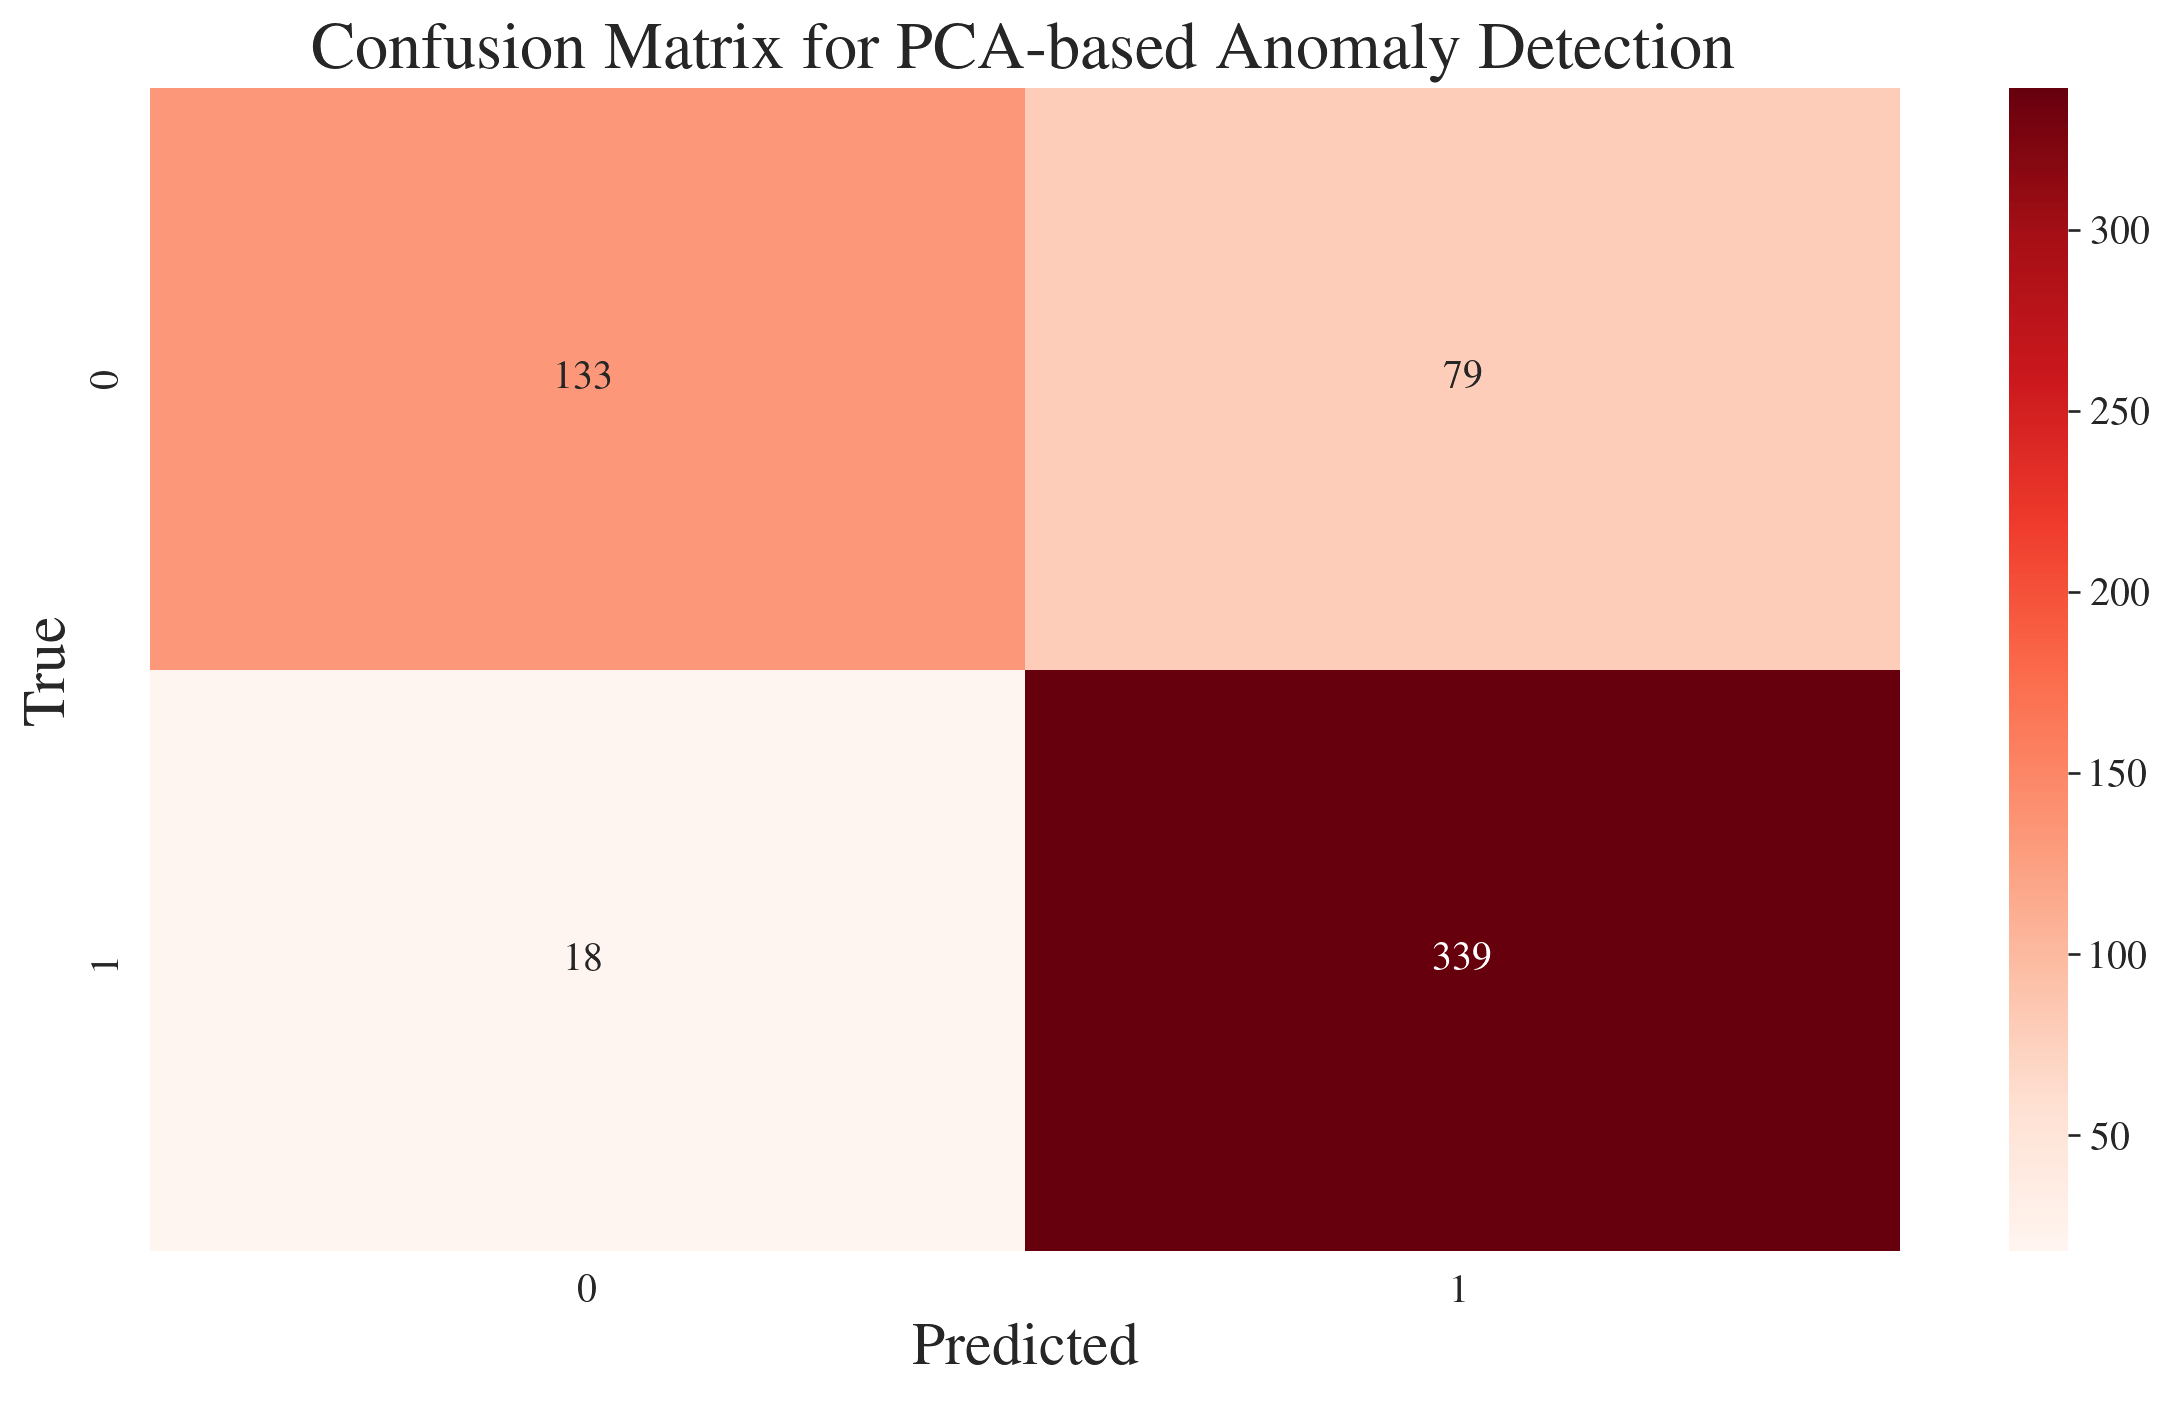

In [15]:
# reconstruct samples using PCA model
transformed_all = all_benign_pca.transform(features_scaled)
untransformed_all = all_benign_pca.inverse_transform(transformed_all)

# calculate loss
loss_all = np.sum((features_scaled - untransformed_all)**2, axis=1)

# Define threshold
threshold = np.percentile(loss_all[benign], 95)

# Predict
y_pred = np.where(loss_all > threshold, 0, 1)  # 0 is malignant, 1 is benign
y_true = target

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix for PCA-based Anomaly Detection')
plt.show()

In [16]:
# Get accuracy
accuracy_score(y_true, y_pred)

0.8295254833040422

The results show that it's about 83% accurate, which isn't the best. An accuracy of around 83% indicates that while the PCA reconstruction loss is somewhat effective at distinguishing between benign and malignant cases, it may not be as robust as other classification methods. This is a reasonable outcome given the inherent challenges of using PCA-based anomaly detection on complex data.

The way I see it, if you refer to the result in problem 2 with the clustered representation in the PCA space, you can see that the data can be distinguished effectively with a linear model. However, with this threshold only approach, it's like we are only fitting to a vertical line only in that graph. If we could define a two parameters instead of just the one threshold value, I bet we could get a more accurate result.